# Data analysis for first population
**INCLUDE:**
1. Data exploration
2. Classification
3. Regression

In [22]:
#Data processing
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.figure_factory as ff

#Plotting
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#Analysis
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#Common Model Algorithms
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import ExtraTreesClassifier, RandomTreesEmbedding
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

#Machine Learning
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn import tree

#Helpers
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from Residual_Visualization import regression_residual_plots
from Confusion_matrix import plot_confusion_matrix

%matplotlib inline

In [12]:
df = pd.read_csv('/Users/duc_hoang/Box Sync/Fermilab Summer Research/CNN-Architectural-Analysis/MINERvA-Vertex-Finding/Data/First-population/First-population-attributes.csv', index_col = 0)

In [13]:
df = df.dropna()

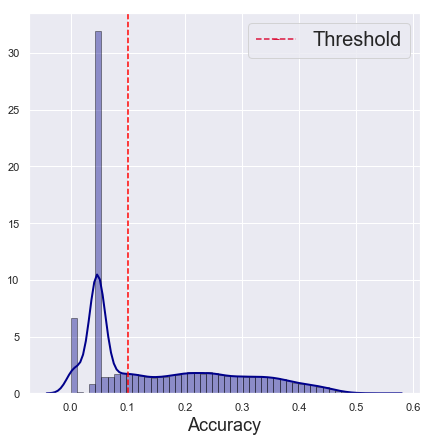

In [14]:
#histogram
fig = plt.figure(figsize=[7,7])
fig1 = sns.distplot(df["final_accuracy"],
                    hist=True, kde=True, 
                    color = 'darkblue',
                    hist_kws={'edgecolor':'black'},
                    kde_kws={'linewidth': 2}, norm_hist=True);

fig1.set_xlabel("Accuracy", fontsize = 18)
plt.axvline(x = 0.100533, ls = "--", c = "red")

# Manually add legend
threshold = mlines.Line2D([], [], color='crimson', marker='_', linestyle='--',
                                    markersize=6, label='Threshold', alpha = 1)

plt.legend(handles=[threshold], fontsize = 20)

In [11]:
#Classification models

In [15]:
#Select the features and dependent variable
X = df.drop(columns=['initial_accuracy','final_accuracy', 'genealogy']) #Features
y = pd.Series([0 if x < 0.100533 else 1 for x in df['final_accuracy']]) #dependent variable

In [16]:
#Divide train and test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state=0)

In [17]:
#Scale the inputs
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test)  

In [18]:
#Explore random forest
rf = RandomForestClassifier(n_estimators=150, max_depth = 17, min_samples_split=40,
                            bootstrap = False, warm_start = True, random_state=0)

rf.fit(X_train, y_train)

print("Accuracy : %f" % rf.score(X_test, y_test))

Accuracy : 0.667203


In [23]:
print("Cross-validation score on train set: ", np.average(cross_val_score(rf, X_train, y_train, cv = 5)))

Cross-validation score on train set:  0.6731973739953748


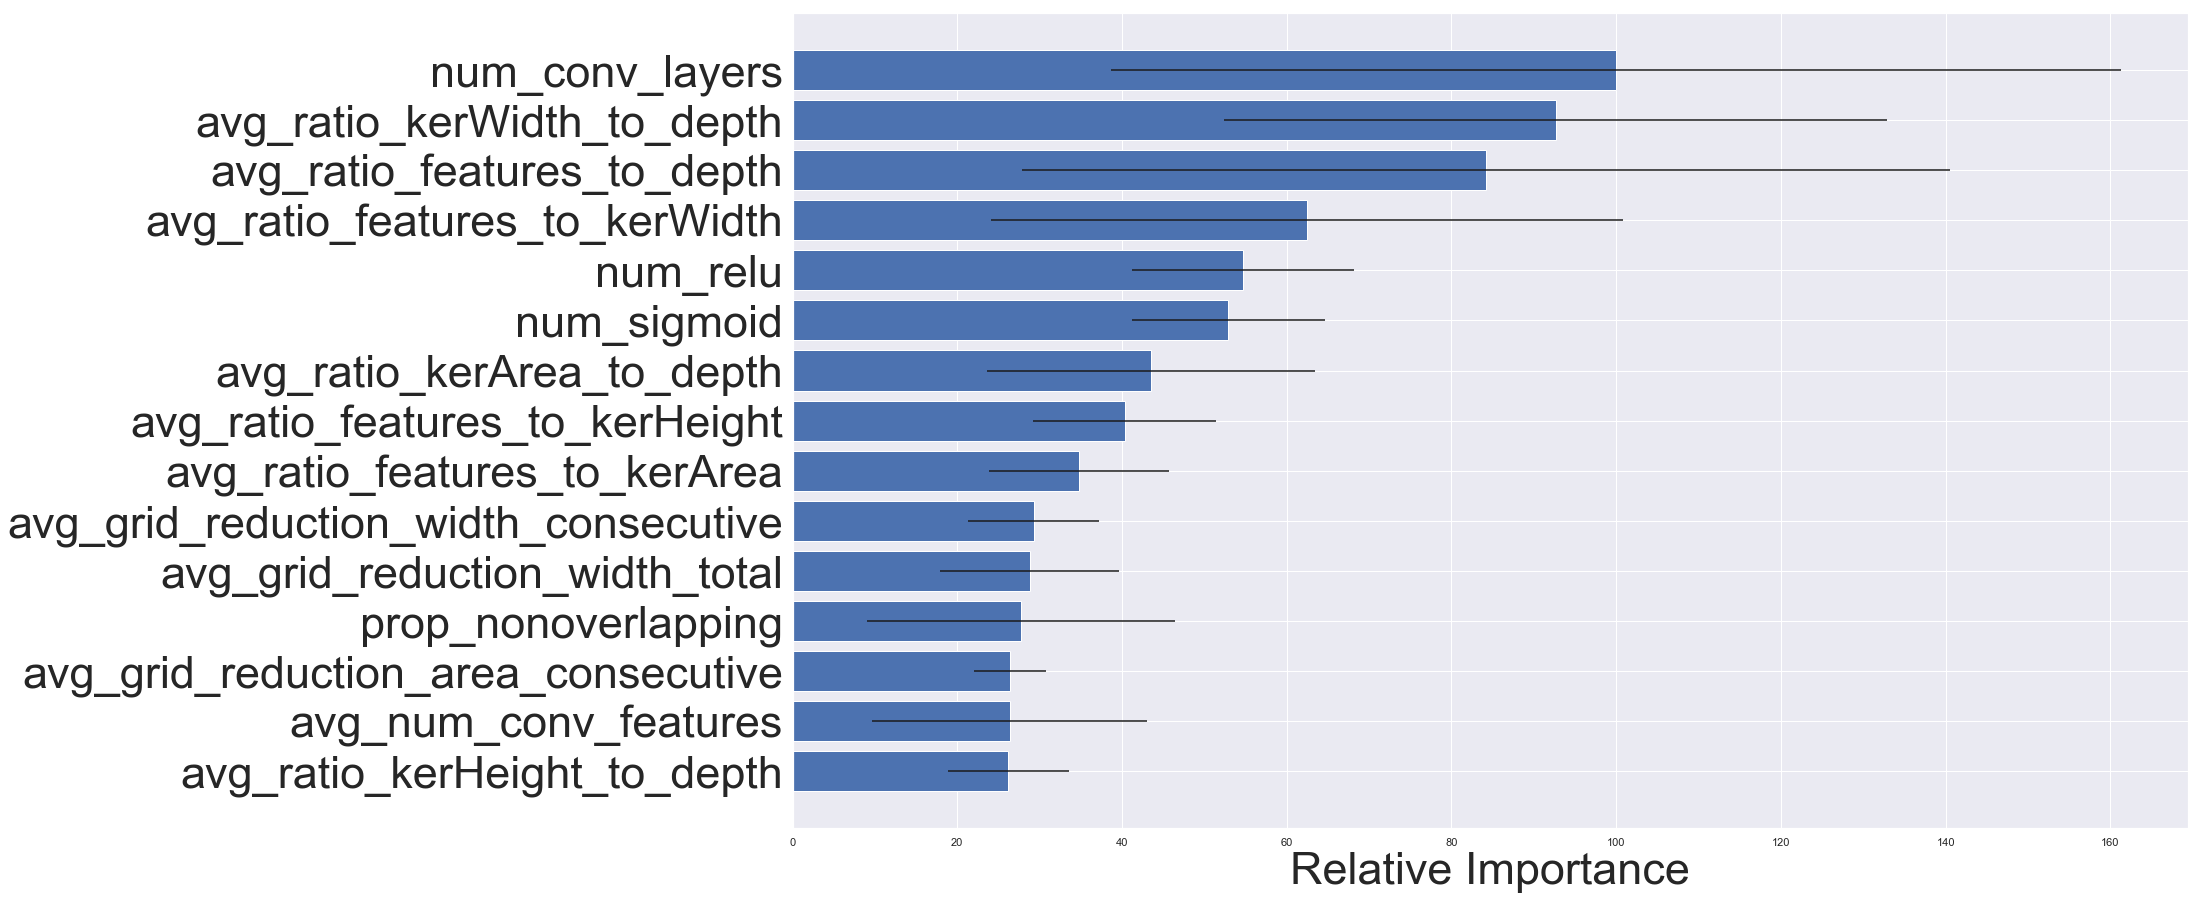

In [27]:
#Feature Importance extraction
feature_importance1 = rf.feature_importances_

# Compute the standard deviation
std1 = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

#scale the std first
std1 = 100.0 * (std1/ feature_importance1.max())

# make importances relative to max importance
feature_importance1 = 100.0 * (feature_importance1 / feature_importance1.max())

features_importance_rf1 = pd.DataFrame({'Feature':X.columns,'Importance':feature_importance1, "Error":std1})

Sorted_Features_importance_rf1 = features_importance_rf1.sort_values(by=['Importance'])

#Just show the first 15 most important features
toShow_15 = Sorted_Features_importance_rf1.iloc[-15:,:]
pos = np.arange(toShow_15.shape[0]) + .5

#Plotting
fig = plt.figure(figsize = [25,15])
plt.barh(pos, toShow_15['Importance'], align='center', xerr = toShow_15['Error'])
plt.yticks(pos, toShow_15['Feature'], fontsize = 45)
plt.xlabel('Relative Importance', fontsize = 45)
plt.show()